In [2]:
import os
os.chdir("../")

In [3]:
%pwd

'f:\\End_To_End_project\\Kidney_Disease_Classification_DL'

In [4]:
import os
def make_dataframes(data_path):
    file_paths = []
    labels = []
    classlist = sorted(os.listdir(data_path))
    print(classlist)

path = r"F:\End_To_End_project\Kidney_Disease_Classification_DL\data\extracted_data\ct-kidney-dataset-normal-cyst-tumor-and-stone\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone"
make_dataframes(data_path=path)

['Cyst', 'Normal', 'Stone', 'Tumor']


#### Here we can see the folder we have `['Cyst', 'Normal', 'Stone', 'Tumor']` ,

In [5]:
import time
def make_dataframes(data_path): 
    filepaths=[]
    labels=[]
    classlist=sorted(os.listdir(data_path)) 
    for cls in classlist:
        classpath = os.path.join(data_path,cls)
        
        if os.path.isdir(classpath):
            print(sorted(os.listdir(classpath)))
            print(f"total Number of images in {cls} :{len(sorted(os.listdir(classpath)))}")
            print()
            

make_dataframes(data_path=path)



['Cyst- (1).jpg', 'Cyst- (10).jpg', 'Cyst- (100).jpg', 'Cyst- (1000).jpg', 'Cyst- (1001).jpg', 'Cyst- (1002).jpg', 'Cyst- (1003).jpg', 'Cyst- (1004).jpg', 'Cyst- (1005).jpg', 'Cyst- (1006).jpg', 'Cyst- (1007).jpg', 'Cyst- (1008).jpg', 'Cyst- (1009).jpg', 'Cyst- (101).jpg', 'Cyst- (1010).jpg', 'Cyst- (1011).jpg', 'Cyst- (1012).jpg', 'Cyst- (1013).jpg', 'Cyst- (1014).jpg', 'Cyst- (1015).jpg', 'Cyst- (1016).jpg', 'Cyst- (1017).jpg', 'Cyst- (1018).jpg', 'Cyst- (1019).jpg', 'Cyst- (102).jpg', 'Cyst- (1020).jpg', 'Cyst- (1021).jpg', 'Cyst- (1022).jpg', 'Cyst- (1023).jpg', 'Cyst- (1024).jpg', 'Cyst- (1025).jpg', 'Cyst- (1026).jpg', 'Cyst- (1027).jpg', 'Cyst- (1028).jpg', 'Cyst- (1029).jpg', 'Cyst- (103).jpg', 'Cyst- (1030).jpg', 'Cyst- (1031).jpg', 'Cyst- (1032).jpg', 'Cyst- (1033).jpg', 'Cyst- (1034).jpg', 'Cyst- (1035).jpg', 'Cyst- (1036).jpg', 'Cyst- (1037).jpg', 'Cyst- (1038).jpg', 'Cyst- (1039).jpg', 'Cyst- (104).jpg', 'Cyst- (1040).jpg', 'Cyst- (1041).jpg', 'Cyst- (1042).jpg', 'Cyst- (1

In [6]:
from PIL import Image
import os
import shutil

def is_corrupted(image_path):
    try:
        with Image.open(image_path) as img:
            img.load()
        return False
    except (IOError, SyntaxError):
        return True

corrupted_images_dir = r"F:\End_To_End_project\Kidney_Disease_Classification_DL\data"

for label in os.listdir(path):
    label_path = os.path.join(path, label)
    if os.path.isdir(label_path):
        print(f"Label Directory: {os.path.basename(label_path)}")
        
        corrupted_found = False
        
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            if is_corrupted(image_path):
                print(f"Corrupted Image: {os.path.basename(image_path)}")
                corrupted_found = True
                
                # Move the corrupted image to the "corrupted_images" directory
                new_path = os.path.join(corrupted_images_dir, os.path.basename(label_path), image_file)
                os.makedirs(os.path.dirname(new_path), exist_ok=True)
                shutil.move(image_path, new_path)
        
        if not corrupted_found:
            print(f"No corrupted images found in this {os.path.basename(label_path)} folder")


Label Directory: Cyst
No corrupted images found in this Cyst folder
Label Directory: Normal
No corrupted images found in this Normal folder
Label Directory: Stone
No corrupted images found in this Stone folder
Label Directory: Tumor
No corrupted images found in this Tumor folder


In [7]:
from PIL import Image
import os
import shutil

class Preprocessing:
    def __init__(self, path, corrupted_images_dir, validated_images_dir):
        self.path = path
        self.corrupted_images_dir = corrupted_images_dir
        self.validated_images_dir = validated_images_dir

    def is_corrupted(self, image_path):
        try:
            with Image.open(image_path) as img:
                img.load()
            return False
        except (IOError, SyntaxError):
            return True

    def process_all_label_directories(self):
        for label in os.listdir(self.path):
            label_path = os.path.join(self.path, label)
            if os.path.isdir(label_path):
                print(f"Label Directory: {os.path.basename(label_path)}")
                
                corrupted_found = False  # let's define Flag to check if any corrupted image is found
                
                for image_file in os.listdir(label_path):
                    image_path = os.path.join(label_path, image_file)
                    if self.is_corrupted(image_path):
                        # let's Move the corrupted image to the "corrupted_images" directory
                        new_path = os.path.join(self.corrupted_images_dir, os.path.basename(label_path), image_file)
                        os.makedirs(os.path.dirname(new_path), exist_ok=True)
                        shutil.move(image_path, new_path)
                        corrupted_found = True
                    else:
                        # let's Move the validated image to the "validated_images" directory
                        new_path = os.path.join(self.validated_images_dir, os.path.basename(label_path), image_file)
                        os.makedirs(os.path.dirname(new_path), exist_ok=True)
                        shutil.copy(image_path, new_path)
                
                if not corrupted_found:
                    print(f"No corrupted images found form this {os.path.basename(label_path)} Folder")
                else:
                    print(f"Corrupted images found form this {os.path.basename(label_path)} floder")



In [8]:
path = r"F:\End_To_End_project\Kidney_Disease_Classification_DL\data\extracted_data\ct-kidney-dataset-normal-cyst-tumor-and-stone\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone"
corrupted_images_dir = r"F:\End_To_End_project\Kidney_Disease_Classification_DL\data\corrupted_images_data"
validated_images_dir = r"F:\End_To_End_project\Kidney_Disease_Classification_DL\data\validated_images_data"

preprocessor = Preprocessing(path, corrupted_images_dir, validated_images_dir)
preprocessor.process_all_label_directories()


Label Directory: Cyst


No corrupted images found form this Cyst Folder
Label Directory: Normal
No corrupted images found form this Normal Folder
Label Directory: Stone
No corrupted images found form this Stone Folder
Label Directory: Tumor
No corrupted images found form this Tumor Folder


## Data Balencing  Started

In [9]:
import time
def make_dataframes(data_path): 
    filepaths=[]
    labels=[]
    classlist=sorted(os.listdir(data_path)) 
    for cls in classlist:
        classpath = os.path.join(data_path,cls) ## like data path is "F:\End_To_End_project\" class is "Cyst"
                                                ## classpath = F:\End_To_End_project\Cyst
        if os.path.isdir(classpath):
            #print(sorted(os.listdir(classpath)))
            print(f"total Number of images in {cls} :{len(sorted(os.listdir(classpath)))}")
            print()
            

make_dataframes(data_path=path)



total Number of images in Cyst :3709

total Number of images in Normal :5077

total Number of images in Stone :1377

total Number of images in Tumor :2283



### Here we can see data is imbalence so we have a two approach -->
    `1. OverSampling -->(data Agumentation)`
    `2. UnderSampling -->here we will count all the class data and find out less class count and make in equal count`

In [10]:
def Undersampling_technique(source_data_dir):
    
    class_directories = [i for i in os.listdir(source_data_dir) if os.path.isdir(os.path.join(source_data_dir,i))]
    print(class_directories)

    ## Let's Count the number of images in every class directory
    class_count = {}
    for class_dir in class_directories:
        class_path = os.path.join(source_data_dir,class_dir)
        class_count[class_dir] = len(os.listdir(class_path))
    print(class_count)

    min_count = min(class_count.values())
    print(min_count)


spath = r"F:\End_To_End_project\Kidney_Disease_Classification_DL\data\validated_images_data"
Undersampling_technique(
                        source_data_dir=spath)

['Cyst', 'Normal', 'Stone', 'Tumor']
{'Cyst': 3709, 'Normal': 5077, 'Stone': 1377, 'Tumor': 2283}
1377


In [11]:
import os
import random
import shutil

class DataBalancing:
    def __init__(self, original_dataset_dir, balanced_dataset_dir, target_count):
        self.original_dataset_dir = original_dataset_dir
        self.balanced_dataset_dir = balanced_dataset_dir
        self.target_count = target_count

    def undersample_and_balance(self):
        os.makedirs(self.balanced_dataset_dir, exist_ok=True)

        ### Listing all class directories in the original dataset
        class_directories = [d for d in os.listdir(self.original_dataset_dir) if os.path.isdir(os.path.join(self.original_dataset_dir, d))]

        #### Count the number of images in each class directory
        class_counts = {}
        for class_dir in class_directories:
            class_path = os.path.join(self.original_dataset_dir, class_dir)
            class_counts[class_dir] = len(os.listdir(class_path))

        #### Determining the minimum count among classes
        min_count = min(class_counts.values())

        # Performing undersampling for classes with more images than the target count
        for class_dir, class_count in class_counts.items():
            if class_count > self.target_count:
                # Calculating the number of images to remove
                images_to_remove = class_count - self.target_count
                class_path = os.path.join(self.original_dataset_dir, class_dir)
                image_files = os.listdir(class_path)

                # Randomly select and remove images
                images_to_remove = random.sample(image_files, images_to_remove)
                for image_file in images_to_remove:
                    image_path = os.path.join(class_path, image_file)
                    os.remove(image_path)

        # Copying the balanced dataset to the new directory
        for class_dir in class_directories:
            source_dir = os.path.join(self.original_dataset_dir, class_dir)
            target_dir = os.path.join(self.balanced_dataset_dir, class_dir)
            os.makedirs(target_dir, exist_ok=True)

            # Copying the first target_count images from each class to the balanced dataset
            image_files = os.listdir(source_dir)[:self.target_count]
            for image_file in image_files:
                source_path = os.path.join(source_dir, image_file)
                target_path = os.path.join(target_dir, image_file)
                shutil.copy(source_path, target_path)

        print("Balanced dataset created in:", self.balanced_dataset_dir)


original_dataset_dir = r"F:\End_To_End_project\Kidney_Disease_Classification_DL\data\validated_images_data"
balanced_dataset_dir = r"F:\End_To_End_project\Kidney_Disease_Classification_DL\data\balanced_dataset"
target_count = 1377 

data_balancer = DataBalancing(original_dataset_dir, balanced_dataset_dir, target_count)
data_balancer.undersample_and_balance()


Balanced dataset created in: F:\End_To_End_project\Kidney_Disease_Classification_DL\data\balanced_dataset


In [12]:
class_directories = [d for d in os.listdir(original_dataset_dir) if os.path.isdir(os.path.join(original_dataset_dir, d))]

class_counts = {}
for class_dir in class_directories:
    class_path = os.path.join(original_dataset_dir, class_dir)
    class_counts[class_dir] = len(os.listdir(class_path))

In [13]:
class_counts

{'Cyst': 1377, 'Normal': 1377, 'Stone': 1377, 'Tumor': 1377}

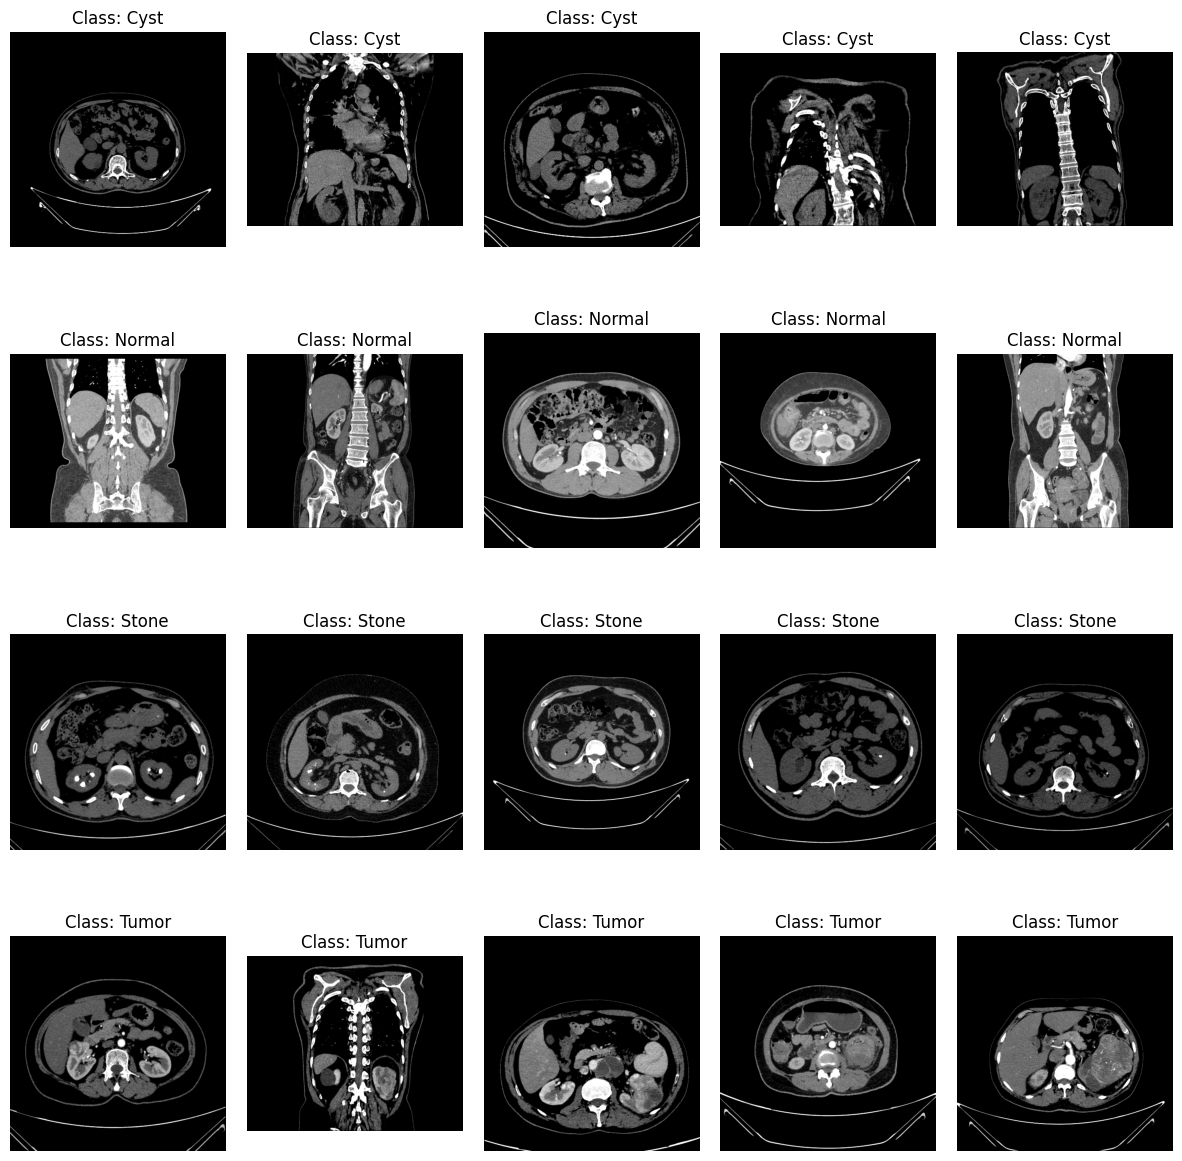

In [14]:
import matplotlib.pyplot as plt

def plot(image_dir):
    
    class_directories = [d for d in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, d))]
    num_images_per_class = 5
    num_columns = 5
    num_rows = len(class_directories)

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))

    for i, class_name in enumerate(class_directories):
        class_path = os.path.join(image_dir, class_name)
        image_files = os.listdir(class_path)

        # Randomly select 5 images for visualization
        selected_images = random.sample(image_files, num_images_per_class)

        for j, image_file in enumerate(selected_images):
            image_path = os.path.join(class_path, image_file)
            with Image.open(image_path) as img:
                axes[i, j].imshow(img)
                axes[i, j].set_title(f"Class: {class_name}")
                axes[i, j].axis("off")

    plt.subplots_adjust(wspace=0.1, hspace=0.2)

    plt.show()


image_dir = r"F:\End_To_End_project\Kidney_Disease_Classification_DL\data\balanced_dataset"

plot(image_dir=image_dir)

### Let's  Do the Image prerocessing

In [32]:
import os
import numpy as np
from PIL import Image

class DataPreprocessing:
    def __init__(self, image_size, save_dir):
        self.image_size = image_size
        self.save_dir = save_dir

    def preprocess_data(self, balanced_dataset_dir):
        # Check if preprocessed data already exists
        if self.check_preprocessed_data_exists():
            print("Preprocessed data already exists. Skipping preprocessing.")
            return self.load_preprocessed_data()
        else:
            print("Preprocessed data does not exist. Preprocessing...")

        # Create lists to store image data and corresponding labels
        image_data = []  # List to store image data
        labels = []

        # List all class directories in the balanced dataset
        class_directories = [d for d in os.listdir(balanced_dataset_dir) if os.path.isdir(os.path.join(balanced_dataset_dir, d))]

        # Assign numerical labels to each class
        class_to_label = {class_name: i for i, class_name in enumerate(class_directories)}

        for class_dir in class_directories:
            class_path = os.path.join(balanced_dataset_dir, class_dir)
            image_files = os.listdir(class_path)
            class_label = class_to_label[class_dir]

            for image_file in image_files:
                image_path = os.path.join(class_path, image_file)

                # Resizing and scaling the image using PIL
                with Image.open(image_path) as img:
                    img = img.resize(self.image_size) 
                    img = img.convert("L")  
                    img_array = np.array(img) / 255.0 

                image_data.append(img_array)
                labels.append(class_label)

        # Convert the lists to NumPy arrays
        image_data = np.array(image_data)
        labels = np.array(labels)

        # Save the preprocessed data
        self.save_preprocessed_data(image_data, labels)

        return image_data, labels

    def save_preprocessed_data(self, image_data, labels):
        if not os.path.exists(self.save_dir):
            os.makedirs(self.save_dir)

        np.save(os.path.join(self.save_dir, "image_data.npy"), image_data)
        np.save(os.path.join(self.save_dir, "labels.npy"), labels)

    def check_preprocessed_data_exists(self):
        return os.path.exists(os.path.join(self.save_dir, "image_data.npy")) and os.path.exists(os.path.join(self.save_dir, "labels.npy"))

    def load_preprocessed_data(self):
        image_data = np.load(os.path.join(self.save_dir, "image_data.npy"))
        labels = np.load(os.path.join(self.save_dir, "labels.npy"))
        return image_data, labels

# Example usage:
image_size = (224, 224)
save_dir = r"F:\End_To_End_project\Kidney_Disease_Classification_DL\data\preprocessed_data"
balanced_dataset_dir = r"F:\End_To_End_project\Kidney_Disease_Classification_DL\data\balanced_dataset"

data_preprocessor = DataPreprocessing(image_size, save_dir)
image_data, labels = data_preprocessor.preprocess_data(balanced_dataset_dir)


Preprocessed data already exists. Skipping preprocessing.


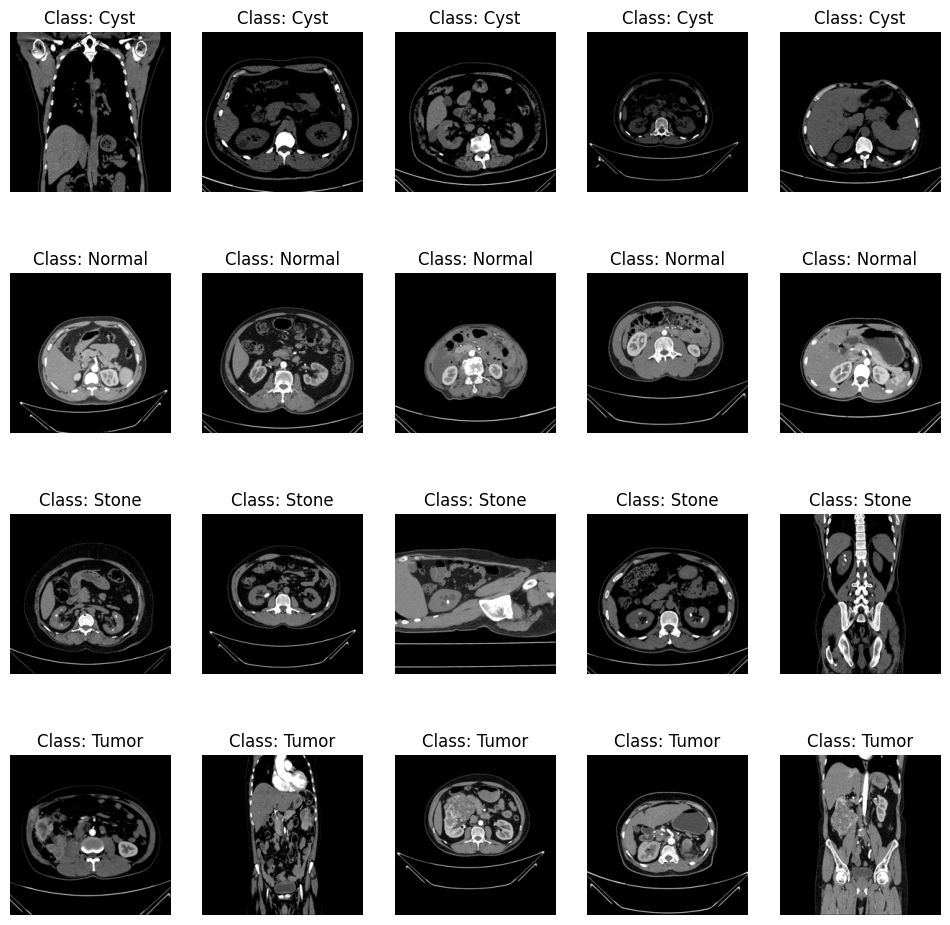

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Define a dictionary that maps class names to numerical labels
class_names = {'Cyst': 0, 'Normal': 1, 'Stone': 2, 'Tumor': 3}

def plot_images_from_classes(image_data, labels, num_images_per_class=5):
    num_classes = len(class_names)  # Use the number of class names
    fig, axes = plt.subplots(num_classes, num_images_per_class, figsize=(12, 12))

    for class_name in class_names:
        class_label = class_names[class_name]
        class_indices = np.where(labels == class_label)[0]
        sampled_indices = np.random.choice(class_indices, num_images_per_class, replace=False)

        for i, index in enumerate(sampled_indices):
            ax = axes[class_label, i]
            ax.imshow(image_data[index], cmap='gray')
            ax.axis('off')
            ax.set_title(f"Class: {class_name}")  # Display class name as a title
    
    
    
    plt.show()

plot_images_from_classes(image_data, labels, num_images_per_class=5)
